In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from  sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier


In [2]:
insurance_df=pd.read_csv('Insurance_Claim.csv')
insurance_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
insurance_df.columns
insurance_df.shape

(1000, 39)

# chi_square

In [4]:
from scipy.stats import chi2_contingency as chi
chi_corr_cat_cols=[]
chi_non_corr_cols=[]
def chi_square(df,out_column):
    cat_cols=[col for col in df.columns if df[col].dtype=='object']
    for col in cat_cols:
        contingency_table=pd.crosstab(df[col],df[out_column])
        p_value=chi(contingency_table)[1]
        if p_value<0.05:
            chi_corr_cat_cols.append(col)
        else:
            chi_non_corr_cols.append(col)
            
    
chi_square(insurance_df,'fraud_reported')

print(chi_corr_cat_cols)

['insured_hobbies', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'property_damage', 'fraud_reported']


In [5]:
print(chi_non_corr_cols)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_date', 'incident_city', 'incident_location', 'police_report_available', 'auto_make', 'auto_model']


# Anova

In [6]:
cont_cols=[col for col in insurance_df.columns if insurance_df[col].dtype=='int64' or insurance_df[col].dtype=='float64']
from scipy.stats import f_oneway
anova_corr_cols=[]
anova_non_corr_cols=[]
for col in cont_cols:
    
    y_list=list(insurance_df[insurance_df['fraud_reported']=='Y'][col])
    n_list=list(insurance_df[insurance_df['fraud_reported']=='N'][col])
    p_value=f_oneway(y_list,n_list)[1]
    if p_value<0.05:
        anova_corr_cols.append(col)
    else:
        anova_non_corr_cols.append(col)
print(anova_corr_cols)

['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


In [7]:
print(anova_non_corr_cols)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_year']


In [8]:
y=insurance_df['fraud_reported']

In [9]:
#total non_corr_cols
total_non_corr_cols=anova_non_corr_cols+chi_non_corr_cols

In [10]:
#identifying the na_pc with grt 50

na_df=pd.DataFrame({'col_name':insurance_df.columns,'na_pc':insurance_df.isnull().sum()/insurance_df.shape[0]*100})
#col_50grt_na_pc=list(na_df[na_df['na_pc']>50]['col_name'])
#col_50grt_na_pc

In [11]:
fraud_reported={'Y':1,'N':0}

insurance_df.fraud_reported=[fraud_reported[item] for item in insurance_df.fraud_reported]

In [12]:
insurance_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


In [13]:
y=insurance_df['fraud_reported']

In [14]:
#identifying non_sense columns
cols_drop=[]
for col in insurance_df.columns:
    if insurance_df[col].nunique()==1 or insurance_df[col].nunique()==insurance_df.shape[0]:
        cols_drop.append(col)
cols_drop=total_non_corr_cols
cols_drop.append('fraud_reported')
print(cols_drop)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_year', 'policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_date', 'incident_city', 'incident_location', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [15]:
#dropping_cols
insurance_df.drop(columns=cols_drop,inplace=True)

In [16]:
insurance_df.columns

Index(['insured_hobbies', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'property_damage', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim'],
      dtype='object')

# train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(insurance_df,y,test_size=0.2,random_state=42)


In [18]:
cont_cols=[col for col in insurance_df.columns if insurance_df[col].dtype=='int64' or insurance_df[col].dtype=='float64']

cat_cols=[col for col in insurance_df.columns if insurance_df[col].dtype=='object']


# filling missing values

In [19]:
for col in cont_cols:
    X_train[col].fillna(X_train[col].mean(),inplace=True)
    X_test[col].fillna(X_train[col].mean(),inplace=True)
    
for col in cat_cols:
    X_train[col].fillna(X_train[col].mode(),inplace=True)
    X_test[col].fillna(X_train[col].mode(),inplace=True)

# scaling

In [20]:
scaler=StandardScaler()
#cont_cols
for col in cont_cols:
    
    X_train[col]=scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=scaler.transform(np.array(X_test[col]).reshape(-1,1))

#cat_cols
oe_train=pd.get_dummies(X_train[cat_cols])

oe_test=pd.get_dummies(X_test[cat_cols])


# merging

In [21]:
oe_train_final,oe_test_final=oe_train.align(oe_test,join='inner',axis=1)

# concatenating

In [22]:
X_train_final=pd.concat([X_train[cont_cols],oe_train_final],axis=1)
X_test_final=pd.concat([X_test[cont_cols],oe_test_final],axis=1)

In [23]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

# Model

In [24]:
logreg=LogisticRegression()

logreg.fit(X_train_final,y_train) 

pred=logreg.predict(X_test_final)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [25]:
probabs=logreg.predict_proba(X_test_final)

pos_probabs=probabs[::,1] # getting only positive values


fpr,tpr,threshold=roc_curve(y_test,pos_probabs) 

fpr,tpr,threshold 

(array([0.        , 0.00689655, 0.00689655, 0.0137931 , 0.0137931 ,
        0.02068966, 0.02068966, 0.03448276, 0.03448276, 0.04827586,
        0.04827586, 0.05517241, 0.05517241, 0.06206897, 0.06206897,
        0.06896552, 0.06896552, 0.07586207, 0.07586207, 0.08275862,
        0.08275862, 0.08965517, 0.08965517, 0.09655172, 0.09655172,
        0.10344828, 0.10344828, 0.11034483, 0.11034483, 0.11724138,
        0.11724138, 0.12413793, 0.12413793, 0.13103448, 0.13103448,
        0.13793103, 0.13793103, 0.15172414, 0.15172414, 0.16551724,
        0.16551724, 0.60689655, 0.60689655, 0.6137931 , 0.6137931 ,
        0.76551724, 0.76551724, 0.7862069 , 0.7862069 , 0.84137931,
        0.84137931, 1.        , 1.        ]),
 array([0.        , 0.        , 0.01818182, 0.01818182, 0.03636364,
        0.03636364, 0.05454545, 0.05454545, 0.09090909, 0.09090909,
        0.14545455, 0.14545455, 0.25454545, 0.25454545, 0.29090909,
        0.29090909, 0.30909091, 0.30909091, 0.34545455, 0.34545455,
  

# AUC_ROC_CURVE

Text(0.5, 1.0, 'AUC_ROC_CURVE')

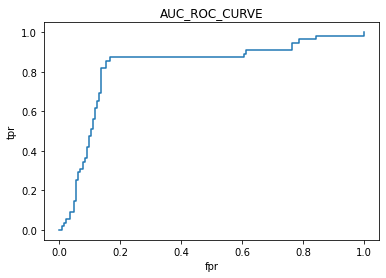

In [26]:
plt.plot(fpr,tpr)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUC_ROC_CURVE')

In [27]:
roc_auc_score(y_test,pos_probabs)

0.8220689655172413

In [28]:
confusion_matrix(y_test,pred)

array([[127,  18],
       [ 19,  36]], dtype=int64)

In [29]:
precision_score(y_test,pred)

0.6666666666666666

In [30]:
recall_score(y_test,pred)

0.6545454545454545

In [31]:
f1_score(y_test,pred)

0.6605504587155963

# test_accuracy


In [32]:
accuracy_score(y_test,pred)

0.815

# train_accuracy

In [33]:
pred1=logreg.predict(X_train_final)
accuracy_score(y_train,pred1)

0.87125

# lasso&ridge

In [34]:
stochastic=SGDClassifier(penalty='l1',alpha=0.01,verbose=1) # l1--> lasso regularization
stochastic.fit(X_train_final,y_train)

-- Epoch 1
Norm: 22.00, NNZs: 6, Bias: -1.212249, T: 800, Avg. loss: 0.781379
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.34, NNZs: 4, Bias: -1.065374, T: 1600, Avg. loss: 0.330731
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 22.56, NNZs: 3, Bias: -1.043727, T: 2400, Avg. loss: 0.316904
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 22.71, NNZs: 4, Bias: -1.042601, T: 3200, Avg. loss: 0.311882
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 22.81, NNZs: 3, Bias: -1.017521, T: 4000, Avg. loss: 0.307951
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 22.88, NNZs: 3, Bias: -1.062121, T: 4800, Avg. loss: 0.304680
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 22.95, NNZs: 3, Bias: -1.056012, T: 5600, Avg. loss: 0.304910
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 23.00, NNZs: 3, Bias: -1.020308, T: 6400, Avg. loss: 0.303326
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 23.05, NNZs: 4, Bias: -0.979546, T: 7200, Avg. loss: 0.303496
Total trai

SGDClassifier(alpha=0.01, penalty='l1', verbose=1)

In [35]:
coeffs=stochastic.coef_
coeffs

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.01451442,
         1.97828272,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.01176999,  1.96894907,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [36]:
len(coeffs[coeffs==0]) # filtering(zeroes)&length of zeros

47

In [37]:
train_pred_lasso=stochastic.predict(X_train_final)
test_pred_lasso=stochastic.predict(X_test_final)

# train&test: Lasso&ridge

In [38]:
print('train score:',accuracy_score(y_train,train_pred_lasso))

train score: 0.85875


In [39]:
print('test score:',accuracy_score(y_test,test_pred_lasso))

test score: 0.835


# Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion="entropy",min_samples_split=2,splitter='best',min_samples_leaf=1, max_depth=None)

dtc.fit(X_train_final,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
preddtc=dtc.predict(X_test_final) # returns the probabilities
probabs=dtc.predict_proba(X_test_final)
pos_probabs=probabs[::,1]  # returns the positive[1] probabilities

fpr,tpr,threshold=roc_curve(y_test,pos_probabs) # y_test-->y_true,pos_probabs-->y_score

fpr,tpr,threshold 

(array([0.        , 0.15172414, 1.        ]),
 array([0. , 0.6, 1. ]),
 array([2., 1., 0.]))

0.7241379310344829

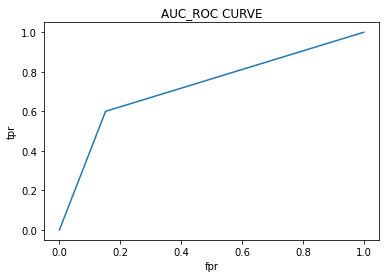

In [42]:
plt.plot(fpr,tpr)

plt.xlabel('fpr')

plt.ylabel('tpr')

plt.title('AUC_ROC CURVE')

roc_auc_score(y_test,preddtc)

In [43]:
accuracy_score(y_test,preddtc)

0.78

In [44]:
preddtc1=dtc.predict(X_train_final)
accuracy_score(y_train,preddtc1)

1.0

In [45]:
accuracy_score(y_test,preddtc)

0.78

In [46]:
precision_score(y_test,preddtc)

0.6

In [47]:
recall_score(y_test,preddtc)

0.6

# hyperparameter tuning

# grid searchcv

In [48]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
param_dict={'max_depth':[4,5,6,7],
           'min_samples_split':[3,4,5,6,7],
           'min_samples_leaf':[3,4,5,6],
           'max_leaf_nodes':[6,7,8,9]
          }
gcv=GridSearchCV(dtc,param_grid=param_dict,cv=7,verbose=21)

gcv.fit(X_train_final,y_train)

Fitting 7 folds for each of 320 candidates, totalling 2240 fits
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.809, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.904, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s



[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.868, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.809, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_de

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s remaining:    0.0s



[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.809, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.904, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_de

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, score=0.868, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.809, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.904, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.825,

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.878, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.825, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.868, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.904,

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.878, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.868,

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.791, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.878, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.868,

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.809, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.878, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.825, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.868, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.868,

[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, score=0.868, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, score=0.868, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.809, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.878, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_dep

[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, score=0.904, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4 
[CV]  max_dep

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, score=0.825, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, score=0.868, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, score=0.877, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, score=0.809,

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.877, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.904, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, score=0.809, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, score=0.878, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, score=0.825,

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.878, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.798, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.904,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.868, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.809, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.798,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.809, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.904, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.798, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.868,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.868, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, score=0.800, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, score=0.878, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, score=0.798,

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.791, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.878, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.798, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.868,

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, score=0.904, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, score=0.791, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, score=0.878, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, score=0.798, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, score=0.860,

[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, score=0.798, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, score=0.868, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, score=0.904, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5 
[CV]  max_dep

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, score=0.904, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, score=0.809, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, score=0.878,

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, score=0.798, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, score=0.904, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, score=0.809,

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.878, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.798, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.904,

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.817, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.878, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.807, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.886,

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.817, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.878, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.807, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.860,

[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, score=0.860, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, score=0.886, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, score=0.877, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.809, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_dep

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.798, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.825, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.868, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.860,

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.868, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.809, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.798, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.825,

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.878, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.798, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.825, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.868, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.904,

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.868, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.791, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.878, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.798,

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.791, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.878, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.798, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.825, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.868,

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, score=0.868, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.817, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.878,

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, score=0.809, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, score=0.878, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, score=0.798, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, score=0.860,

[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.809, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.878, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.798, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_dep

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.817, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.878, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.807,

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.817, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.878, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.807, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.825, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.886,

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.825, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.886, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.817, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.878,

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.868, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.809, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.904,

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.809, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.798, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.868,

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.868, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.809, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.904,

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.791, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.878, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.798, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.860,

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.798, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.868, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, score=0.791,

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.791, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.878, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.798, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.860,

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.798, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.868, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, score=0.809,

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.809, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.878, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.798, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.860,

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.809, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.878,

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.807, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.886, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, score=0.817,

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.817, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.878, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.807, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.886,

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.825, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.860, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.886, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.904, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.809, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.852,

[Parallel(n_jobs=1)]: Done 2240 out of 2240 | elapsed:   38.4s finished


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             verbose=21)

In [49]:
gcv.best_score_

0.8537648468998583

In [50]:
gcv.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [51]:
gcv_test_pred=gcv.predict(X_test_final)
gcv_train_pred=gcv.predict(X_train_final)

In [52]:
print('train accuracy:',accuracy_score(y_train,gcv_train_pred))
print('test accuracy:',accuracy_score(y_test,gcv_test_pred))

train accuracy: 0.8675
test accuracy: 0.83


# randomised searchcv

In [53]:
#decision tree
from sklearn.model_selection import RandomizedSearchCV
dtc=DecisionTreeClassifier()
param_dict={'max_depth':[4,5,6,7],
           'min_samples_split':[3,4,5,6,7],
           'min_samples_leaf':[3,4,5,6],
           'max_leaf_nodes':[6,7,8,9]
          }
rmcv=RandomizedSearchCV(dtc,param_distributions=param_dict,cv=7,verbose=31,n_iter=30)

rmcv

RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_leaf_nodes': [6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7]},
                   verbose=31)

In [54]:
rmcv.fit(X_train_final,y_train)

Fitting 7 folds for each of 30 candidates, totalling 210 fits
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.809, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.878, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.798, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.825, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.868, total=   0.0s
[CV] min_samples_split=7, mi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s



[CV] min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.860, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.868, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.904, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4 
[CV]  min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4, score=0.800, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4 
[CV]  min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4, score=0.878, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4 
[CV]  min_sa

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s remaining:    0.0s



[CV] min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7, score=0.798, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7, score=0.825, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7, score=0.860, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7, score=0.868, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7, score=0.904, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=6 
[CV]  min_sa

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s remaining:    0.0s



[CV]  min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=6, score=0.860, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=6 
[CV]  min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=6, score=0.904, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.800, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.878, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.798, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.825

[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7, score=0.878, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7, score=0.798, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7, score=0.825, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7, score=0.860, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7, score=0.868, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  min_sam

[CV]  min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.868, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.904, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.817, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.878, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.807, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.825,

[CV]  min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.807, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.825, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.860, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.886, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.877, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.817,

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    3.8s finished


RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_leaf_nodes': [6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7]},
                   verbose=31)

In [55]:
rmcv.best_score_

0.8537648468998583

In [56]:
predrmcv=rmcv.predict(X_test_final) # returns the probabilities
probabsrmcv=rmcv.predict_proba(X_test_final)
pos_probabsrmcv=probabsrmcv[::,1]  # returns the positive[1] probabilities
fpr,tpr,threshold=roc_curve(y_test,pos_probabsrmcv) # y_test-->y_true,pos_probabs-->y_score

fpr,tpr,threshold 


(array([0.        , 0.        , 0.        , 0.04137931, 0.04137931,
        0.15862069, 0.16551724, 0.9862069 , 1.        ]),
 array([0.        , 0.07272727, 0.10909091, 0.21818182, 0.29090909,
        0.8       , 0.87272727, 1.        , 1.        ]),
 array([2.        , 1.        , 0.90909091, 0.8       , 0.77272727,
        0.56291391, 0.4       , 0.03910615, 0.        ]))

0.8206896551724139

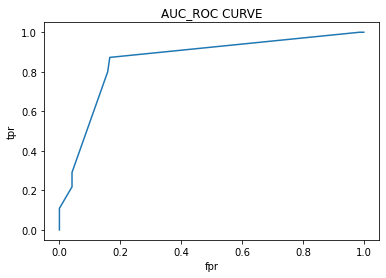

In [57]:
plt.plot(fpr,tpr)

plt.xlabel('fpr')

plt.ylabel('tpr')

plt.title('AUC_ROC CURVE')

roc_auc_score(y_test,predrmcv)

In [58]:
dtcv_test_pred=rmcv.predict(X_test_final)
dtcv_train_pred=rmcv.predict(X_train_final)

In [59]:
print('train accuracy:',accuracy_score(y_train,dtcv_train_pred)) # train accuracy
print('test accuracy:',accuracy_score(y_test,dtcv_test_pred)) # test accuracy

train accuracy: 0.8675
test accuracy: 0.83


# Adaboost --> ensemble model

In [63]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train_final,y_train)

AdaBoostClassifier()

In [67]:
train_pred=abc.predict(X_train_final)
test_pred=abc.predict(X_test_final)

In [68]:
print('train accuracy:', accuracy_score(y_train,train_pred))
print('test accuracy:', accuracy_score(y_test,test_pred))

train accuracy: 0.87625
test accuracy: 0.77


# hyperparameter tuing for adaboost

# Gridsearchcv

In [86]:
from sklearn.model_selection import GridSearchCV
abc=AdaBoostClassifier()
abc_param_dict={
            'n_estimators':[50,60,70],
            'learning_rate':[0.1,0.02,0.001]
               }
abc_gcv=GridSearchCV(abc,param_grid=abc_param_dict,cv=7,verbose=21)             


In [87]:
abc_gcv.fit(X_train_final,y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. learning_rate=0.1, n_estimators=50, score=0.783, total=   0.3s
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=50, score=0.861, total=   0.3s
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=50, score=0.798, total=   0.4s
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=50, score=0.807, total=   0.3s
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=50, score=0.842, total=   0.3s
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=50, score=0.816, total=   0.2s
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=50, score=0.772, total=   0.3s
[CV] learning_rate=0.1, n_estimators=60 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=60, score=0.774, total=   0.3s
[CV] learning_rate=0.1, n_estimators=60 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=60, score=0.835, total=   0.3s
[CV] learning_rate=0.1, n_estimators=60 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.6s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=60, score=0.807, total=   0.4s
[CV] learning_rate=0.1, n_estimators=60 ..............................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.0s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=60, score=0.798, total=   0.3s
[CV] learning_rate=0.1, n_estimators=60 ..............................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.3s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=60, score=0.833, total=   0.4s
[CV] learning_rate=0.1, n_estimators=60 ..............................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.7s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=60, score=0.807, total=   0.4s
[CV] learning_rate=0.1, n_estimators=60 ..............................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.0s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=60, score=0.807, total=   0.3s
[CV] learning_rate=0.1, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    4.4s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=70, score=0.791, total=   0.4s
[CV] learning_rate=0.1, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.7s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=70, score=0.835, total=   0.4s
[CV] learning_rate=0.1, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.1s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=70, score=0.807, total=   0.4s
[CV] learning_rate=0.1, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.5s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=70, score=0.781, total=   0.3s
[CV] learning_rate=0.1, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.8s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=70, score=0.842, total=   0.3s
[CV] learning_rate=0.1, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    6.2s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=70, score=0.816, total=   0.4s
[CV] learning_rate=0.1, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.5s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=70, score=0.798, total=   0.4s
[CV] learning_rate=0.02, n_estimators=50 .............................
[CV] . learning_rate=0.02, n_estimators=50, score=0.791, total=   0.3s
[CV] learning_rate=0.02, n_estimators=50 .............................
[CV] . learning_rate=0.02, n_estimators=50, score=0.835, total=   0.3s
[CV] learning_rate=0.02, n_estimators=50 .............................
[CV] . learning_rate=0.02, n_estimators=50, score=0.798, total=   0.3s
[CV] learning_rate=0.02, n_estimators=50 .............................
[CV] . learning_rate=0.02, n_estimators=50, score=0.807, total=   0.3s
[CV] learning_rate=0.02, n_estimators=50 .............................
[CV] . learning_rate=0.02, n_estimators=50, score=0.851, total=   0.3s
[CV] learning_rate=0.02, n_estimators=50 .............................
[CV] . learning_rate=0.02, n_estimators=50, score=0.807, total=   0.3s
[CV] learning_rate=0.02, n_estimators=50 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   20.2s finished


GridSearchCV(cv=7, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.02, 0.001],
                         'n_estimators': [50, 60, 70]},
             verbose=21)

In [88]:
abc_gcv.best_params_

{'learning_rate': 0.02, 'n_estimators': 50}

In [89]:
abc_gcv.best_score_

0.8187643020594965

In [90]:
abcgcv_pred_train=abc_gcv.predict(X_train_final)
abcgcv_pred_test=abc_gcv.predict(X_test_final)

In [91]:
print('train accuracy:', accuracy_score(y_train,abcgcv_pred_train))
print('test accuracy:', accuracy_score(y_test,abcgcv_pred_test))

train accuracy: 0.81875
test accuracy: 0.78


# Randomised searchcv

In [100]:
#random forest
from sklearn.model_selection import RandomizedSearchCV

abc=AdaBoostClassifier()
randomabc_param_dict={
            'n_estimators':[50,60,70],
            'learning_rate':[0.1,0.02,0.01]
               }
abc_randomcv=RandomizedSearchCV(abc,param_distributions=randomabc_param_dict,cv=7,verbose=21,n_iter=21)             
abc_randomcv.fit(X_train_final,y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits
[CV] n_estimators=50, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. n_estimators=50, learning_rate=0.1, score=0.783, total=   0.2s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] .. n_estimators=50, learning_rate=0.1, score=0.861, total=   0.1s
[CV] n_estimators=50, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .. n_estimators=50, learning_rate=0.1, score=0.798, total=   0.1s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] .. n_estimators=50, learning_rate=0.1, score=0.807, total=   0.1s
[CV] n_estimators=50, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV] .. n_estimators=50, learning_rate=0.1, score=0.842, total=   0.1s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] .. n_estimators=50, learning_rate=0.1, score=0.816, total=   0.1s
[CV] n_estimators=50, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s


[CV] .. n_estimators=50, learning_rate=0.1, score=0.772, total=   0.1s
[CV] n_estimators=60, learning_rate=0.1 ..............................
[CV] .. n_estimators=60, learning_rate=0.1, score=0.774, total=   0.2s
[CV] n_estimators=60, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s


[CV] .. n_estimators=60, learning_rate=0.1, score=0.835, total=   0.2s
[CV] n_estimators=60, learning_rate=0.1 ..............................
[CV] .. n_estimators=60, learning_rate=0.1, score=0.807, total=   0.2s
[CV] n_estimators=60, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s remaining:    0.0s


[CV] .. n_estimators=60, learning_rate=0.1, score=0.798, total=   0.2s
[CV] n_estimators=60, learning_rate=0.1 ..............................
[CV] .. n_estimators=60, learning_rate=0.1, score=0.833, total=   0.2s
[CV] n_estimators=60, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.8s remaining:    0.0s


[CV] .. n_estimators=60, learning_rate=0.1, score=0.807, total=   0.2s
[CV] n_estimators=60, learning_rate=0.1 ..............................
[CV] .. n_estimators=60, learning_rate=0.1, score=0.807, total=   0.2s
[CV] n_estimators=70, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.1s remaining:    0.0s


[CV] .. n_estimators=70, learning_rate=0.1, score=0.791, total=   0.2s
[CV] n_estimators=70, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.3s remaining:    0.0s


[CV] .. n_estimators=70, learning_rate=0.1, score=0.835, total=   0.2s
[CV] n_estimators=70, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.6s remaining:    0.0s


[CV] .. n_estimators=70, learning_rate=0.1, score=0.807, total=   0.2s
[CV] n_estimators=70, learning_rate=0.1 ..............................
[CV] .. n_estimators=70, learning_rate=0.1, score=0.781, total=   0.2s
[CV] n_estimators=70, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.0s remaining:    0.0s


[CV] .. n_estimators=70, learning_rate=0.1, score=0.842, total=   0.2s
[CV] n_estimators=70, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.2s remaining:    0.0s


[CV] .. n_estimators=70, learning_rate=0.1, score=0.816, total=   0.2s
[CV] n_estimators=70, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.4s remaining:    0.0s


[CV] .. n_estimators=70, learning_rate=0.1, score=0.798, total=   0.2s
[CV] n_estimators=50, learning_rate=0.02 .............................
[CV] . n_estimators=50, learning_rate=0.02, score=0.791, total=   0.1s
[CV] n_estimators=50, learning_rate=0.02 .............................
[CV] . n_estimators=50, learning_rate=0.02, score=0.835, total=   0.1s
[CV] n_estimators=50, learning_rate=0.02 .............................
[CV] . n_estimators=50, learning_rate=0.02, score=0.798, total=   0.1s
[CV] n_estimators=50, learning_rate=0.02 .............................
[CV] . n_estimators=50, learning_rate=0.02, score=0.807, total=   0.2s
[CV] n_estimators=50, learning_rate=0.02 .............................
[CV] . n_estimators=50, learning_rate=0.02, score=0.851, total=   0.2s
[CV] n_estimators=50, learning_rate=0.02 .............................
[CV] . n_estimators=50, learning_rate=0.02, score=0.807, total=   0.2s
[CV] n_estimators=50, learning_rate=0.02 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   11.3s finished


RandomizedSearchCV(cv=7, estimator=AdaBoostClassifier(), n_iter=21,
                   param_distributions={'learning_rate': [0.1, 0.02, 0.01],
                                        'n_estimators': [50, 60, 70]},
                   verbose=21)

In [101]:
abc_randomcv.best_params_

{'n_estimators': 50, 'learning_rate': 0.02}

In [102]:
abc_randomcv.best_score_

0.8187643020594965

In [103]:
abcrandomcv_pred_train=abc_randomcv.predict(X_train_final)
abcrandomcv_pred_test=abc_randomcv.predict(X_test_final)

In [104]:
print('train accuracy:', accuracy_score(y_train,abcrandomcv_pred_train))
print('test accuracy:', accuracy_score(y_test,abcrandomcv_pred_test))

train accuracy: 0.81875
test accuracy: 0.78


# Gradient Boost-->ensemble modelling

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train_final,y_train)

GradientBoostingClassifier()

In [109]:
gbc_test_pred=GBC.predict(X_test_final)
gbc_train_pred=GBC.predict(X_train_final)

In [110]:
print('train accuracy:', accuracy_score(y_train,gbc_train_pred))
print('test accuracy:', accuracy_score(y_test,gbc_test_pred))

train accuracy: 0.95875
test accuracy: 0.8


# Hyperparameter tuning-->GBC

# Randomisedsearchcv

In [117]:
from sklearn.model_selection import RandomizedSearchCV
GBC=GradientBoostingClassifier()
gbc_random_dict={'min_samples_split':[2,3,5],
                'n_estimators':[100,200,150],
                 'min_samples_leaf':[2,3,4],
                  'learning_rate':[0.1,0.02,0.001],
                   'max_depth':[2,3,5]}
gbc_randomcv=RandomizedSearchCV(GBC,param_distributions=gbc_random_dict,n_iter=100,cv=7,verbose=21)
gbc_randomcv.fit(X_train_final,y_train)

Fitting 7 folds for each of 100 candidates, totalling 700 fits
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.757, total=   0.3s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.757, total=   0.2s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.2s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.2s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.2s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.3s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.754, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.757, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.757, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.763, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.763, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.763, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.763, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.754, total=   0.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.757, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    7.6s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.757, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    8.0s remaining:    0.0s



[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.754, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.791, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.870, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.746, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.746, total=   0.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.833, total=   0

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=2, learning_rate=0.001, score=0.763, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=2, learning_rate=0.001, score=0.763, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=2, learning_rate=0.001, score=0.763, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=2, learning_rate=0.001, score=0.754, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_depth=2, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_depth=2, learning_rate=0.1, score=0.7

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=5, learning_rate=0.02, score=0.860, total=   0.4s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.001, score=0.757, total=   0.4s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.001, score=0.757, total=   0.3s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.001, score=0.763, total=   0.4s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.001, score=

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1, score=0.887, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1, score=0.825, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1, score=0.860, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=2, learning_rate=0.1, score=0.877, total=   0

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.763, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.001, score=0.754, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_depth=2, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=2, max_depth=2, learning_rate=0.1, score=0.8

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_depth=3, learning_rate=0.001, score=0.763, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_depth=3, learning_rate=0.001 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_depth=3, learning_rate=0.001, score=0.754, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.791, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.870, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.746, tota

[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.757, total=   0.5s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.757, total=   0.5s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.763, total=   0.6s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score=0.763, total=   0.6s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.001, score

[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1, score=0.772, total=   0.3s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1, score=0.763, total=   0.3s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1, score=0.851, total=   0.3s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1, score=0.886, total=   0.3s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=3, learning_rate=0.1, score=0.860, total=   0

[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=2, max_depth=2, learning_rate=0.02, score=0.868, total=   0.2s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=2, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=2, max_depth=2, learning_rate=0.02, score=0.877, total=   0.2s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=2, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=2, max_depth=2, learning_rate=0.02, score=0.842, total=   0.2s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.1 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.1, score=0.809, total=   0.2s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.1 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=2, learning_rate=0.1, score=0.861, total

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02, score=0.800, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02, score=0.861, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02, score=0.807, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02, score=0.825, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.02, score=0.877, t

[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1, score=0.789, total=   0.4s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1, score=0.763, total=   0.4s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1, score=0.842, total=   0.4s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1, score=0.895, total=   0.4s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.1, score=0.851, total=   0

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=3, learning_rate=0.1, score=0.842, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=3, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=3, learning_rate=0.1, score=0.895, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=3, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=3, learning_rate=0.1, score=0.868, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.02, score=0.809, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.02, score=0.861, total=

[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=2, learning_rate=0.02, score=0.842, total=   0.3s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=2, learning_rate=0.02, score=0.800, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=2, learning_rate=0.02, score=0.843, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=2, learning_rate=0.02, score=0.807, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=2, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_depth=2, learning_rate=0.02, score=0.816, t

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02, score=0.852, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02, score=0.763, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02, score=0.763, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02, score=0.851, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=5, learning_rate=0.02, score=0.877, t

[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.02, score=0.754, total=   0.5s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.02, score=0.868, total=   0.5s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.02, score=0.851, total=   0.5s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=3, max_depth=5, learning_rate=0.02, score=0.860, total=   0.5s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.800, tot

[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.1, score=0.877, total=   0.6s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.1, score=0.860, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.001, score=0.757, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.001, score=0.757, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=2, learning_rate=0.001, score=0.763

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02, score=0.800, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02, score=0.852, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02, score=0.789, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, learning_rate=0.02, score=0.877, t

[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001, score=0.763, total=   0.6s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001, score=0.763, total=   0.6s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001, score=0.763, total=   0.5s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001, score=0.763, total=   0.5s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=2, max_depth=5, learning_rate=0.001, score

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=3, learning_rate=0.001, score=0.763, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=3, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=3, learning_rate=0.001, score=0.763, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=3, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=3, learning_rate=0.001, score=0.754, total=   0.2s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.02, score=0.817, total=   0.5s
[CV] n_estimators=150, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.02 
[CV]  n_estimators=150, min_samples_split=3, min_samples_leaf=4, max_depth=5, learning_rate=0.02, score=0.8

[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:  4.5min finished


RandomizedSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.02, 0.001],
                                        'max_depth': [2, 3, 5],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 200, 150]},
                   verbose=21)

In [118]:
gbc_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 2,
 'learning_rate': 0.1}

In [120]:
gbc_randomcv.best_score_

0.8425084450256076

In [121]:
randomgbc_train_pred=gbc_randomcv.predict(X_train_final)
randomgbc_test_pred=gbc_randomcv.predict(X_test_final)

In [122]:
print('train accuracy:', accuracy_score(y_train,randomgbc_train_pred))
print('test accuracy:', accuracy_score(y_test,randomgbc_test_pred))

train accuracy: 0.9425
test accuracy: 0.8


# Support vector machine

In [124]:
#Grid searccv
from sklearn.svm import SVC
svc=SVC()
from sklearn.model_selection import GridSearchCV
gridsvm_param_dict={'C':[0.01,1.0],
           'kernel':['linear','poly'],
            'degree':[1,3],
            'gamma':['scale','float']
           } 
svmgridcv=GridSearchCV(svc,cv=8,param_grid=gridsvm_param_dict)
svmgridcv.fit(X_train_final,y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [0.01, 1.0], 'degree': [1, 3],
                         'gamma': ['scale', 'float'],
                         'kernel': ['linear', 'poly']})

In [125]:
svmgridcv.best_params_

{'C': 1.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [126]:
svmgridcv.best_score_

0.85375

In [128]:
svm_train_pred=svmgridcv.predict(X_train_final)
svm_test_pred=svmgridcv.predict(X_test_final)

In [129]:
print('train accuracy:', accuracy_score(y_train,svm_train_pred))
print('test accuracy:', accuracy_score(y_test,svm_test_pred))

train accuracy: 0.87375
test accuracy: 0.84


# Randomized searchcv

In [130]:
svc=SVC()
from sklearn.model_selection import RandomizedSearchCV
random_param_dict={'C':[0.01,0.001,1.0],
           'kernel':['linear','poly'],
            'degree':[1,3,5],
            'gamma':['scale','float']
           } 
svmrandomizedcv=RandomizedSearchCV(svc,cv=8,param_distributions=random_param_dict,n_iter=20)
svmrandomizedcv.fit(X_train_final,y_train)

RandomizedSearchCV(cv=8, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.01, 0.001, 1.0],
                                        'degree': [1, 3, 5],
                                        'gamma': ['scale', 'float'],
                                        'kernel': ['linear', 'poly']})

In [131]:
svmrandomizedcv.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'degree': 5, 'C': 1.0}

In [133]:
svmrandomizedcv.best_score_

0.85375

In [134]:
svmrandom_train_pred=svmrandomizedcv.predict(X_train_final)
svmrandom_test_pred=svmrandomizedcv.predict(X_test_final)

In [135]:
print('train accuracy:', accuracy_score(y_train,svmrandom_train_pred))
print('test accuracy:', accuracy_score(y_test,svmrandom_test_pred))

train accuracy: 0.87375
test accuracy: 0.84


# Randomforest

In [137]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(X_train_final,y_train)
predrfc=rfc.predict(X_test_final)

In [138]:
accuracy_score(y_test,predrfc)

0.81

In [139]:
predrfc1=rfc.predict(X_train_final) # train predictions

accuracy_score(y_train,predrfc1) # train accuracy

1.0

# hyperparameter tuning-->Random forest

# Gridsearchcv

In [147]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
randomforest_param_dict={'max_depth':[4,5,6,7],
           'min_samples_split':[3,4,5,7],
           'min_samples_leaf':[3,4,5,6],
           'max_leaf_nodes':[6,7,8,9],
            'n_estimators':[100,200,250]
          }
gcvrfc=GridSearchCV(rfc,param_grid=randomforest_param_dict,cv=8,verbose=21)


In [148]:
gcvrfc.fit(X_train_final,y_train)

Fitting 8 folds for each of 768 candidates, totalling 6144 fits
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.740, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.750, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.8s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.6s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.9s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.3s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.7s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.2s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.7s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    6.1s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.6s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.750, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.750, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.740, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.770, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.760, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.750, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.730, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.760, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.740, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.760, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.760, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.740, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.750, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.760, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.740, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.750, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.780, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.740, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.750, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.810, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.760, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.740, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.740, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.760, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.750, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.760, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.770, total=   0.3s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.770, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.730, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.760, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.750, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.750, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.750, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.800, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.750, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.770, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.770, total=   0.7s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.750, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.750, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.760, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.800, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.760, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.750, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.760, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.810, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.760, total=   0.5s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.760, total=   0.2s
[CV] 

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.750, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.800, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.770, total=   0.5s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.810, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.830, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.840, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.750, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.750, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.810, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.790, total=   0.5s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.800, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.730, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.790, total=   0.3s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.810, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.730, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.800, total=   0.3s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.800, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.820, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.760, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.830, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.810, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.750, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.800, total=   0.5s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.820, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.800, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.800, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.800, total=   0.3s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.750, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.760, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.850, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.750, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.820, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.800, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.830, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.820, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.810, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.760, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.800, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.800, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.800, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.810, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.790, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.760, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.840, total=   0.5s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.790, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.790, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.820, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.760, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.830, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.820, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.820, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.800, total=   0.5s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.730, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.810, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.840, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.800, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.850, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.830, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.830, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.820, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.750, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] 

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.840, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.800, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.790, total=   0.5s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.830, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.750, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.750, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.760, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.840, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=250, score=0.810, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.770, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.730, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, score=0.800, total=   0.3s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.750, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.760, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.850, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.750, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.790, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.790, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=250, score=0.800, total=   0.6s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.840, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.820, total=   0.5s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.810, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=200, score=0.810, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.750, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.830, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.790, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.750, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.830, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=250, score=0.780, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=200, score=0.780, total=   0.3s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.840, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.810, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.820, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.840, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.830, total=   0.3s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.810, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=250, score=0.760, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.830, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.810, total=   0.5s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=200, score=0.830, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.820, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.760, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.810, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.820, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=250, score=0.800, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.790, total=   0.5s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.830, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.830, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.820, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.800, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.820, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.800, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=250, score=0.750, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.840, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.800, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.810, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.840, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.820, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.840, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=0.810, total=   0.3s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.820, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.850, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.830, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.800, total=   0.4s
[CV] 

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.820, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.760, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=250, score=0.810, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200, score=0.820, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.750, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.760, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.740, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.760, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=250, score=0.760, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.740, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.730, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.780, total=   0.6s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.810, total=   0.6s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.770, total=   0.6s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.780, total=   0.6s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.780, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.830, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.800, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.750, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.820, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.800, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.840, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.770, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.750, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.780, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.840, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.810, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.760, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.840, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250, score=0.800, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.780, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=200, score=0.790, total=   0.3s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.830, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.800, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.820, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.810, total=   0.3s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.840, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=250, score=0.780, total=   0.5s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.750, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.850, total=   0.6s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.850, total=   0.6s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.800, total=   0.6s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.790, total=   0.5s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.740, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.810, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=200, score=0.850, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.830, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.780, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.780, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.760, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.810, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.820, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.830, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.820, total=   0.5s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.840, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200, score=0.770, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.800, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.800, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.810, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=250, score=0.800, total=   0.5s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=200, score=0.820, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=250, score=0.790, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.790, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.840, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.820, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=250, score=0.760, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.790, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.830, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.780, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.750, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.760, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.810, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.810, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=250, score=0.840, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.810, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.770, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.840, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=200, score=0.790, total=   0.4s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=250, score=0.770, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.770, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100, score=0.820, total=   0.2s
[CV] 

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.750, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.840, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.760, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=200 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=200, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=250, score=0.790, total=   0.4s
[CV] 

[Parallel(n_jobs=1)]: Done 6144 out of 6144 | elapsed: 35.2min finished


GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 7],
                         'n_estimators': [100, 200, 250]},
             verbose=21)

In [149]:
gcvrfc.best_params_

{'max_depth': 7,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 7,
 'n_estimators': 100}

In [150]:
gcvrfc.best_score_

0.8162499999999999

In [151]:
rfcgrid_train_pred=gcvrfc.predict(X_train_final)
rfcgrid_test_pred=gcvrfc.predict(X_test_final)

In [152]:
print('train accuracy:', accuracy_score(y_train,rfcgrid_train_pred))
print('test accuracy:', accuracy_score(y_test,rfcgrid_test_pred))

train accuracy: 0.8625
test accuracy: 0.77


# Randomized searchcv

In [157]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

randomcv_param_dict={'max_depth':[4,5,6,7],
           'min_samples_split':[3,4,5,6],
           'min_samples_leaf':[3,4,5,6],
           'max_leaf_nodes':[6,7,8,9],
            'n_estimators':[100,200,300,350]  
          }
randomforestcv=RandomizedSearchCV(rfc,param_distributions=randomcv_param_dict,cv=7,verbose=31,n_iter=300)
randomforestcv.fit(X_train_final,y_train)

Fitting 7 folds for each of 300 candidates, totalling 2100 fits
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.765, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.835, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.807, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.763, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.798, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.825, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.772, total=   0.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.765, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.765, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.798, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.763, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.772, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.772, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.1s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.754, total=   0.6s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    6.7s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.774, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    7.1s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.757, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    7.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.781, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    7.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.754, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    8.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.789, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4 


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.9s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=4, score=0.754, total=   0.4s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    9.3s remaining:    0.0s


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.757, total=   0.7s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   10.0s remaining:    0.0s


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.826, total=   0.7s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   10.7s remaining:    0.0s


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.789, total=   0.6s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   11.3s remaining:    0.0s


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.772, total=   0.7s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   12.0s remaining:    0.0s


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.798, total=   0.7s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   12.7s remaining:    0.0s


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.789, total=   0.7s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   13.4s remaining:    0.0s


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.754, total=   0.7s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   14.1s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.774, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   14.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.757, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   14.9s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.798, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.763, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=4, score=0.754, total=   0.4s
[CV] 

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=6, max_depth=7, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=6, max_depth=7, score=0.754, total=   0.2s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=9, max_depth=4, score=0.774, total=   0.6s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=9, max_depth=4, score=0.783, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=9, max_depth=4, score=0.807, total=   0.6s
[CV] 

[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.791, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.754, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.789, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.754, total=   0.2s
[CV] 

[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7, score=0.807, total=   0.6s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7, score=0.798, total=   0.6s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=7, score=0.772, total=   0.5s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6, score=0.765, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6, score=0.835, total=   0.2s
[CV] 

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.757, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.817, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.789, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.772, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.798, total=   0.5s
[CV] 

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.772, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.772, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.807, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.754, total=   0.5s
[CV] n_estimators=350, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=5, score=0.774, total=   0.6s
[CV] 

[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.772, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.765, total=   0.6s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.826, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.816, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.781, total=   0.5s
[CV] 

[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.807, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.825, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.772, total=   0.5s
[CV] 

[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=5, score=0.781, total=   0.6s
[CV] n_estimators=350, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=5 
[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=5, score=0.754, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.757, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.817, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.789, total=   0.3s
[CV] 

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.791, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.754, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.816, total=   0.5s
[CV] 

[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5, score=0.781, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5, score=0.772, total=   0.5s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=6, score=0.757, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=8, max_depth=6, score=0.835, total=   0.2s
[CV] 

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4, score=0.765, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4, score=0.748, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4, score=0.781, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4, score=0.763, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4, score=0.781, total=   0.4s
[CV] 

[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.789, total=   0.6s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.825, total=   0.6s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.772, total=   0.6s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.772, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5, score=0.748, total=   0.5s
[CV] 

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.754, total=   0.3s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.765, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.791, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=5, score=0.763, total=   0.6s
[CV] 

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.781, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.763, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.772, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.772, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.754, total=   0.5s
[CV] 

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=5, score=0.816, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=5, score=0.772, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=4, score=0.765, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=4, score=0.791, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=4, score=0.789, total=   0.2s
[CV] 

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6, score=0.757, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6, score=0.807, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6, score=0.746, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6, score=0.789, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=6, score=0.781, total=   0.4s
[CV] 

[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.781, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.816, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.754, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.765, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.817, total=   0.4s
[CV] 

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.783, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.772, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.763, total=   0.2s
[CV] 

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.807, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.798, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.772, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=7, score=0.765, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=7, score=0.843, total=   0.2s
[CV] 

[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.765, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.843, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.816, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.754, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.772, total=   0.6s
[CV] 

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=7, score=0.798, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=7, score=0.825, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=7, score=0.798, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=7, score=0.763, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.748, total=   0.4s
[CV] 

[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.789, total=   0.5s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.748, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.817, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.798, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.798, total=   0.4s
[CV] 

[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.789, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.763, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.807, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.807, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.772, total=   0.5s
[CV] 

[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.789, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6, score=0.757, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6, score=0.765, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6, score=0.807, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=6, max_depth=6, score=0.772, total=   0.2s
[CV] 

[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.798, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.737, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=9, max_depth=7, score=0.748, total=   0.2s
[CV] 

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.754, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.774, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.826, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.789, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=5, score=0.763, total=   0.2s
[CV] 

[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.807, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.789, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.789, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4, score=0.783, total=   0.4s
[CV] 

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.765, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.843, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.798, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.789, total=   0.3s
[CV] 

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.816, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.772, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.772, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.781, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.746, total=   0.3s
[CV] 

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.772, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.739, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.826, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.816, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.789, total=   0.6s
[CV] 

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.816, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.816, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=7, max_depth=6, score=0.763, total=   0.2s
[CV] n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=4, score=0.765, total=   0.6s
[CV] 

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=5, score=0.763, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5, score=0.783, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5, score=0.817, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5, score=0.825, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=8, max_depth=5, score=0.781, total=   0.2s
[CV] 

[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.816, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.789, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.816, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.772, total=   0.5s
[CV] 

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6, score=0.816, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6, score=0.789, total=   0.4s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.765, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.774, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.798, total=   0.6s
[CV] 

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.835, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.807, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.754, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.807, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.798, total=   0.3s
[CV] 

[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=5, score=0.789, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=5, score=0.825, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=8, max_depth=5, score=0.772, total=   0.5s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.748, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.765, total=   0.2s
[CV] 

[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4, score=0.765, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4, score=0.757, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4, score=0.789, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4, score=0.763, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=4, score=0.772, total=   0.5s
[CV] 

[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.789, total=   0.6s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.807, total=   0.6s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.789, total=   0.6s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=7, max_depth=6, score=0.789, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=6, max_depth=5, score=0.783, total=   0.5s
[CV] 

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5, score=0.781, total=   0.3s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=4, score=0.765, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=4, score=0.757, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=4, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, max_depth=4, score=0.754, total=   0.5s
[CV] 

[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.781, total=   0.6s
[CV] n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.798, total=   0.6s
[CV] n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.816, total=   0.6s
[CV] n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.807, total=   0.6s
[CV] n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=350, min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.772, total=   0.6s
[CV] 

[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.763, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.754, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=5, score=0.748, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=5, score=0.809, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=5, score=0.807, total=   0.5s
[CV] 

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.826, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.807, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.798, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.816, total=   0.4s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.789, total=   0.4s
[CV] 

[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.772, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.754, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=4, score=0.754, total=   0.7s
[CV] n_estimators=350, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=350, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.765, total=   0.6s
[CV] n_estimators=350, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=350, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=7, max_depth=6, score=0.826, total=   0.6s
[CV] 

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.748, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.835, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.789, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=8, max_depth=7, score=0.807, total=   0.4s
[CV] 

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.763, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=6, max_depth=4, score=0.754, total=   0.3s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.765, total=   0.3s
[CV] 

[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=7, score=0.763, total=   0.5s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.748, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.800, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.807, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.763, total=   0.2s
[CV] 

[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.763, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.807, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.781, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_leaf_nodes=7, max_depth=6, score=0.772, total=   0.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=200, min_sampl

[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=7, max_depth=5, score=0.763, total=   0.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.765, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.835, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.807, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.789, total=   0.4s
[CV] 

[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.789, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.789, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.816, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.816, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=6, score=0.789, total=   0.5s
[CV] 

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=5, score=0.807, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_leaf_nodes=9, max_depth=5, score=0.781, total=   0.4s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4, score=0.774, total=   0.7s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4, score=0.774, total=   0.6s
[CV] n_estimators=350, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=350, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4, score=0.789, total=   0.6s
[CV] 

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4, score=0.774, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4, score=0.781, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4, score=0.754, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4, score=0.772, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4, score=0.763, total=   0.4s
[CV] 

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.816, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.754, total=   0.2s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.757, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.826, total=   0.5s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=9, max_depth=6, score=0.825, total=   0.5s
[CV] 

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4, score=0.765, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4, score=0.789, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4, score=0.763, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4, score=0.772, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=8, max_depth=4, score=0.763, total=   0.4s
[CV] 

[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.789, total=   0.6s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.772, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.763, total=   0.5s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=6, score=0.739, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=6, score=0.791, total=   0.2s
[CV] 

[Parallel(n_jobs=1)]: Done 2100 out of 2100 | elapsed: 14.9min finished


RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=300,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_leaf_nodes': [6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 350]},
                   verbose=31)

In [158]:
randomforestcv.best_params_

{'n_estimators': 350,
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 9,
 'max_depth': 6}

In [159]:
randomforestcv.best_score_

0.8037593984962407

In [160]:
forestrandom_train_pred=randomforestcv.predict(X_train_final)
forestrandom_test_pred=randomforestcv.predict(X_test_final)

In [161]:
print('train accuracy:', accuracy_score(y_train,forestrandom_train_pred))
print('test accuracy:', accuracy_score(y_test,forestrandom_test_pred))

train accuracy: 0.865
test accuracy: 0.76
